In [1]:
#libraries to be used
from bs4 import BeautifulSoup
from wordcloud import WordCloud, STOPWORDS
import requests
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [2]:
#getting data using requests
#url is this so we will
url = "https://www.whitehouse.gov/remarks/2025/03/remarks-by-president-trump-in-joint-address-to-congress"
#request the url
response = requests.get(url)
#check if request was successful
if response.status_code == 200:
    print("Data successfully retrieved!")
    soup = BeautifulSoup(response.content, "html.parser")
else:
    print(f"Failed to retrieve data, status code: {response.status_code}")

Data successfully retrieved!


In [3]:
#find all paragraphs
paragraphs = soup.find_all("p")

#collect clean paragraphs after the president and skip audience lines
textStarted = False
speechText = ""

for p in paragraphs:
    t = p.get_text().strip()
    if "THE PRESIDENT:" in t:
        textStarted = True
        t = t.split("THE PRESIDENT:")[-1].strip()
    if textStarted:
        if not t.startswith("AUDIENCE"):
            speechText += " " + t


In [4]:
#add custom stopwords
custom_stops = set([
    "PRESIDENT", "Applause", "Cross-talk", "Laughter", "Laughs",
    "don", "won", "s", "t", "'", "ve", "re", "ll", "u", "m"
])

stopwords = STOPWORDS.union(custom_stops)
#load us map mask
mask = np.array(Image.open("USmap.png"))



In [7]:
#generate word cloud
wc = WordCloud(
    background_color="white",
    stopwords=stopwords,
    mask=mask,
    contour_width=1,
    contour_color='blue'
)

wc.generate(speechText)

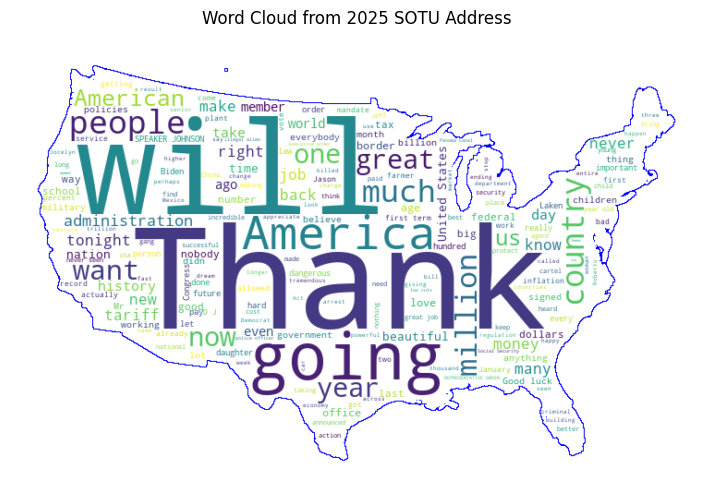

In [8]:
#data visualization
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud from 2025 SOTU Address")
plt.show()
